## Load Modules

In [1]:
from DataLoading import load_and_partition_samples, mergeDatasets
from DetailsDisplayer import detailsDisplayer
import torch
# from ShowImages import showImages
from Augmentation import generate
from torch.utils.data import DataLoader, Dataset
import gc


## General Properties

In [2]:
no_path = 'C:/Projects/Big-Files/brain_tumor_dataset/no'
yes_path = 'C:/Projects/Big-Files/brain_tumor_dataset/yes'
n_augmented_samples = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda


## Choice of Classifier

In [3]:
classifier_choice = 'ResNet'
# classifier_choice = 'EfficientNet'
if classifier_choice == 'ResNet':
    from Evaluation import classify_ResNet
    classify = classify_ResNet
    print('Using ResNet')
else:
    from Evaluation import classify_EfficientNet
    classify = classify_EfficientNet
    print('Using EfficientNet')

Using ResNet


## Load Data

### Load the healthy samples

In [4]:
no_1_dataset, no_2_dataset, no_3_dataset, no_4_dataset = load_and_partition_samples(no_path)
print('no_1_dataset:', len(no_1_dataset), 'samples')
print('no_2_dataset:', len(no_2_dataset), 'samples')
print('no_3_dataset:', len(no_3_dataset), 'samples')
print('no_4_dataset:', len(no_4_dataset), 'samples')

no_1_dataset: 24 samples
no_2_dataset: 24 samples
no_3_dataset: 25 samples
no_4_dataset: 25 samples


### Load the samples with tumor

In [5]:
yes_1_dataset, yes_2_dataset, yes_3_dataset, yes_4_dataset = load_and_partition_samples(yes_path)
print('yes_1_dataset:', len(yes_1_dataset), 'samples')
print('yes_2_dataset:', len(yes_2_dataset), 'samples')
print('yes_3_dataset:', len(yes_3_dataset), 'samples')
print('yes_4_dataset:', len(yes_4_dataset), 'samples')

yes_1_dataset: 38 samples
yes_2_dataset: 38 samples
yes_3_dataset: 39 samples
yes_4_dataset: 40 samples


# Fold 1

In [6]:
no_123: DataLoader = mergeDatasets([no_1_dataset, no_2_dataset, no_3_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_123)
yes_123: DataLoader = mergeDatasets([yes_1_dataset, yes_2_dataset, yes_3_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_123)

Batch Size: 16
Number of Batches: 5
Total Samples: 73
Samples per class:
Class 0: 73 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 115
Samples per class:
Class 0: 0 samples
Class 1: 115 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

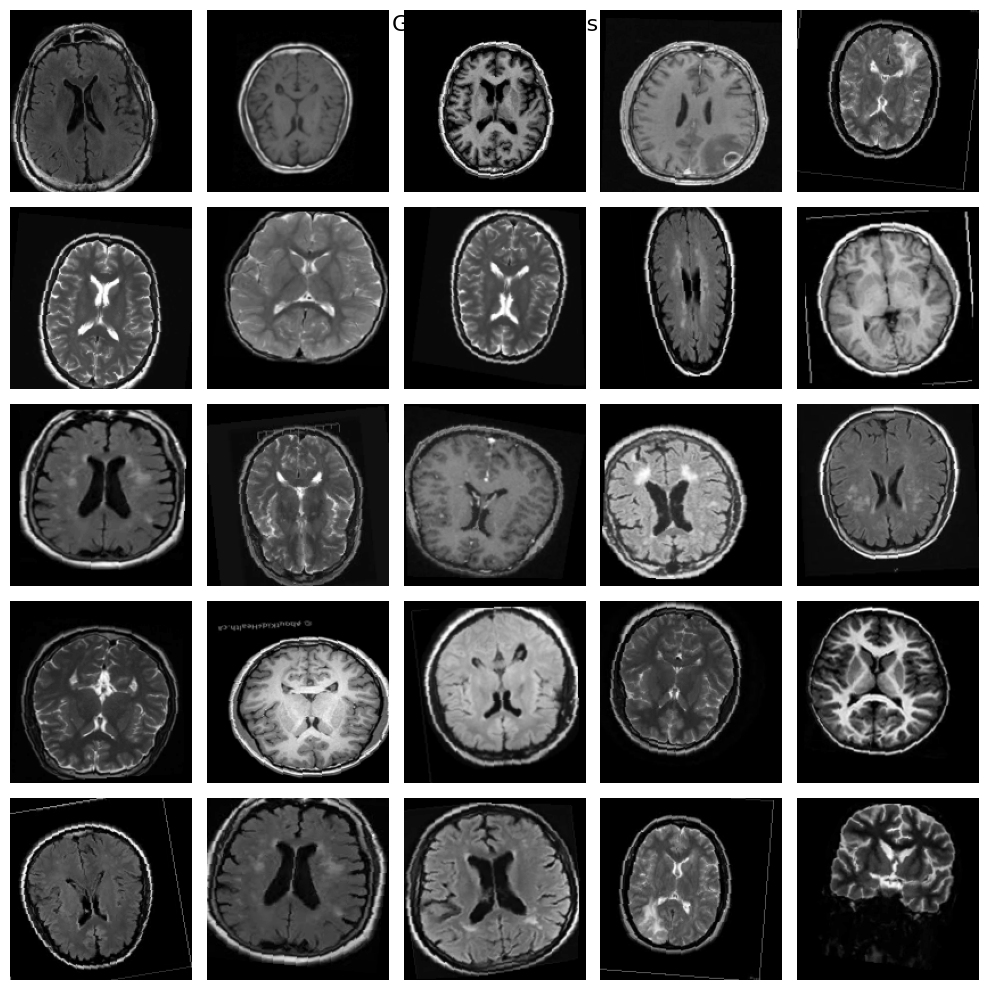

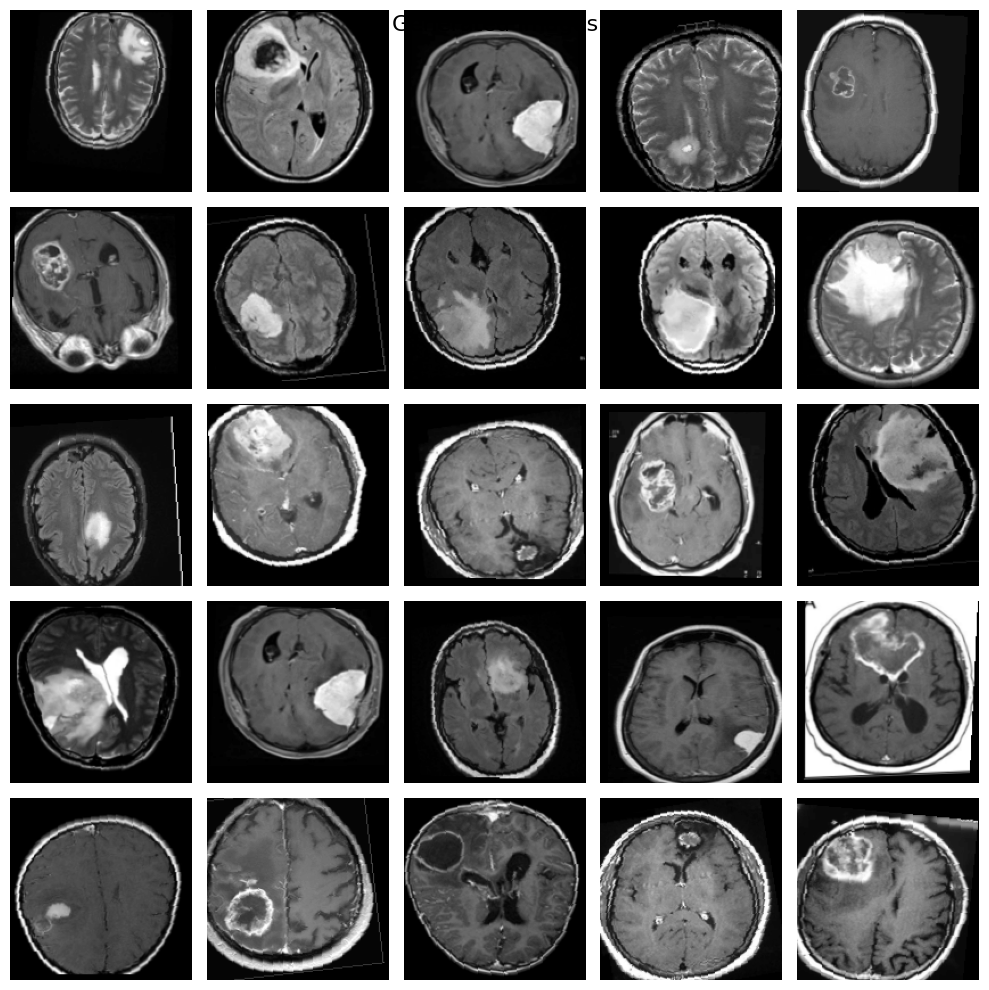

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 188
Samples per class:
Class 0: 73 samples
Class 1: 115 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])


In [7]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_123: Dataset = generate(num_images=n_augmented_samples, train_loader=no_123)
    gen_yes_123: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_123)
    train_loader = mergeDatasets(
        [no_123.dataset, yes_123.dataset, gen_no_123, gen_yes_123], ["n", "y", "n", "y"], True
    )
    del gen_no_123, gen_yes_123
else:
    train_loader = mergeDatasets([no_123.dataset, yes_123.dataset], ["n", "y"], True)

del no_123, yes_123
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [8]:
test_loader = mergeDatasets([no_4_dataset, yes_4_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 5
Total Samples: 65
Samples per class:
Class 0: 25 samples
Class 1: 40 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Classify

Epoch [1/50], Loss: 0.7578, Accuracy: 62.23%
Epoch [2/50], Loss: 0.5740, Accuracy: 71.81%
Epoch [3/50], Loss: 0.5079, Accuracy: 77.13%
Epoch [4/50], Loss: 0.4523, Accuracy: 78.72%
Epoch [5/50], Loss: 0.5099, Accuracy: 77.66%
Epoch [6/50], Loss: 0.4480, Accuracy: 81.91%
Epoch [7/50], Loss: 0.4080, Accuracy: 80.32%
Epoch [8/50], Loss: 0.3065, Accuracy: 86.17%
Epoch [9/50], Loss: 0.2700, Accuracy: 87.77%
Epoch [10/50], Loss: 0.3005, Accuracy: 89.89%
Epoch [11/50], Loss: 0.2975, Accuracy: 88.83%
Epoch [12/50], Loss: 0.2680, Accuracy: 89.36%
Epoch [13/50], Loss: 0.1680, Accuracy: 93.62%
Epoch [14/50], Loss: 0.2134, Accuracy: 93.62%
Epoch [15/50], Loss: 0.1057, Accuracy: 97.34%
Epoch [16/50], Loss: 0.1453, Accuracy: 95.21%
Epoch [17/50], Loss: 0.0639, Accuracy: 98.40%
Epoch [18/50], Loss: 0.0858, Accuracy: 97.87%
Epoch [19/50], Loss: 0.0785, Accuracy: 96.81%
Epoch [20/50], Loss: 0.0789, Accuracy: 96.81%
Epoch [21/50], Loss: 0.1103, Accuracy: 95.74%
Epoch [22/50], Loss: 0.1717, Accuracy: 93.6

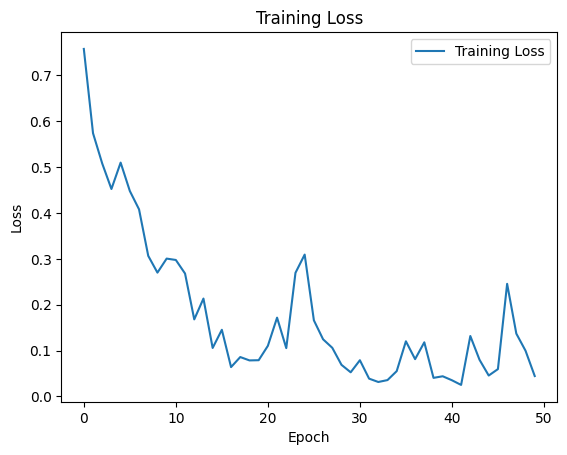

Test Loss: 0.6091, Test Accuracy: 81.54%
Class-wise Accuracy: [72.0, 87.5]


In [9]:
test_loss_1, test_acc_1, class_accuracy_1 = classify(train_loader, test_loader)

# Fold 2

In [10]:
no_124: DataLoader = mergeDatasets([no_1_dataset, no_2_dataset, no_4_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_124)
yes_124: DataLoader = mergeDatasets([yes_1_dataset, yes_2_dataset, yes_4_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_124)

Batch Size: 16
Number of Batches: 5
Total Samples: 73
Samples per class:
Class 0: 73 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 116
Samples per class:
Class 0: 0 samples
Class 1: 116 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

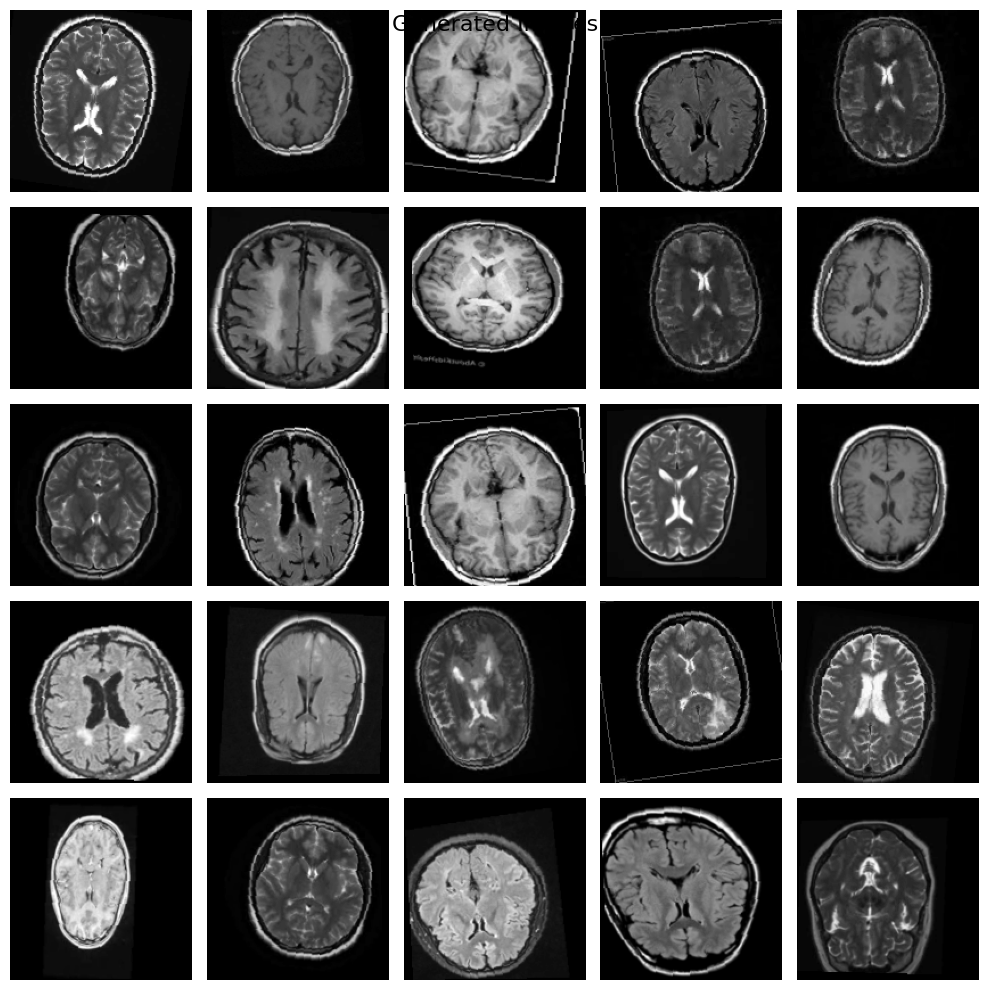

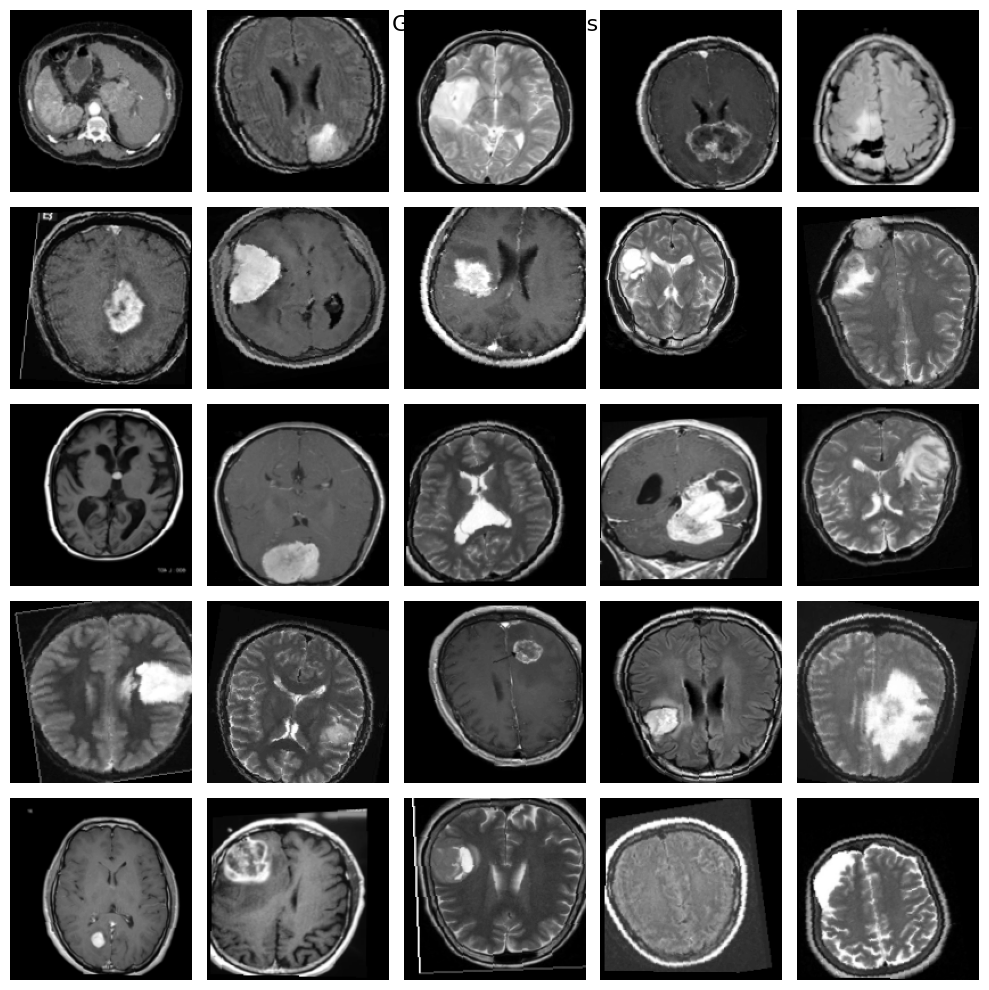

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 189
Samples per class:
Class 0: 73 samples
Class 1: 116 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])


In [11]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_124: Dataset = generate(num_images=n_augmented_samples, train_loader=no_124)
    gen_yes_124: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_124)
    train_loader = mergeDatasets(
        [no_124.dataset, yes_124.dataset, gen_no_124, gen_yes_124], ["n", "y", "n", "y"], True
    )
    del gen_no_124, gen_yes_124
else:
    train_loader = mergeDatasets([no_124.dataset, yes_124.dataset], ["n", "y"], True)

del no_124, yes_124
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [12]:
test_loader = mergeDatasets([no_3_dataset, yes_3_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 4
Total Samples: 64
Samples per class:
Class 0: 25 samples
Class 1: 39 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Classify

Epoch [1/50], Loss: 0.7062, Accuracy: 61.90%
Epoch [2/50], Loss: 0.5867, Accuracy: 67.20%
Epoch [3/50], Loss: 0.4767, Accuracy: 76.19%
Epoch [4/50], Loss: 0.3595, Accuracy: 85.71%
Epoch [5/50], Loss: 0.4375, Accuracy: 81.48%
Epoch [6/50], Loss: 0.3094, Accuracy: 89.95%
Epoch [7/50], Loss: 0.2328, Accuracy: 94.18%
Epoch [8/50], Loss: 0.2438, Accuracy: 91.53%
Epoch [9/50], Loss: 0.1307, Accuracy: 96.30%
Epoch [10/50], Loss: 0.1754, Accuracy: 91.01%
Epoch [11/50], Loss: 0.1535, Accuracy: 93.65%
Epoch [12/50], Loss: 0.1073, Accuracy: 96.30%
Epoch [13/50], Loss: 0.0537, Accuracy: 99.47%
Epoch [14/50], Loss: 0.0832, Accuracy: 96.30%
Epoch [15/50], Loss: 0.1438, Accuracy: 94.71%
Epoch [16/50], Loss: 0.1234, Accuracy: 95.24%
Epoch [17/50], Loss: 0.0895, Accuracy: 96.83%
Epoch [18/50], Loss: 0.0327, Accuracy: 99.47%
Epoch [19/50], Loss: 0.0492, Accuracy: 98.94%
Epoch [20/50], Loss: 0.0345, Accuracy: 98.41%
Epoch [21/50], Loss: 0.0430, Accuracy: 98.94%
Epoch [22/50], Loss: 0.0528, Accuracy: 98.9

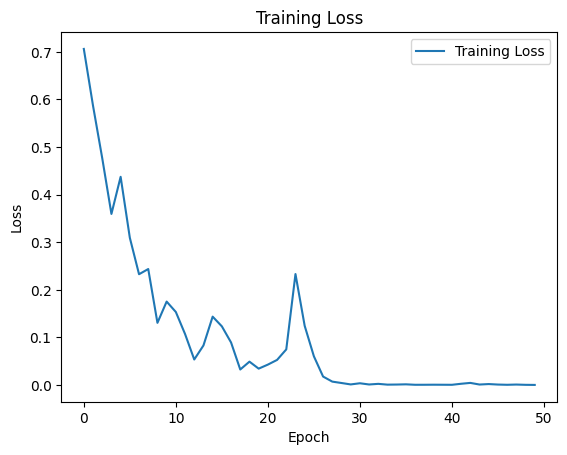

Test Loss: 1.1856, Test Accuracy: 84.38%
Class-wise Accuracy: [76.0, 89.74358974358974]


In [13]:
test_loss_2, test_acc_2, class_accuracy_2 = classify(train_loader, test_loader)

# Fold 3

In [14]:
no_134: DataLoader = mergeDatasets([no_1_dataset, no_3_dataset, no_4_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_134)
yes_134: DataLoader = mergeDatasets([yes_1_dataset, yes_3_dataset, yes_4_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_134)

Batch Size: 16
Number of Batches: 5
Total Samples: 74
Samples per class:
Class 0: 74 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 117
Samples per class:
Class 0: 0 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

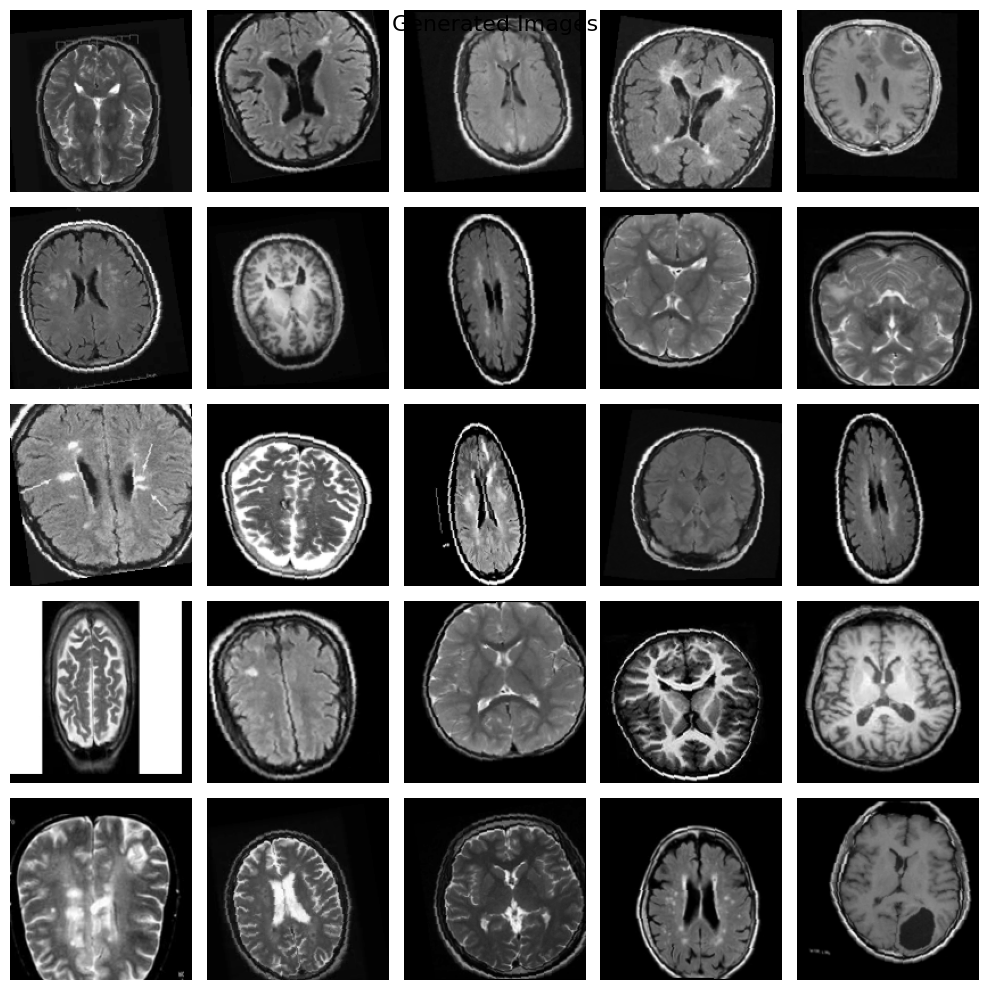

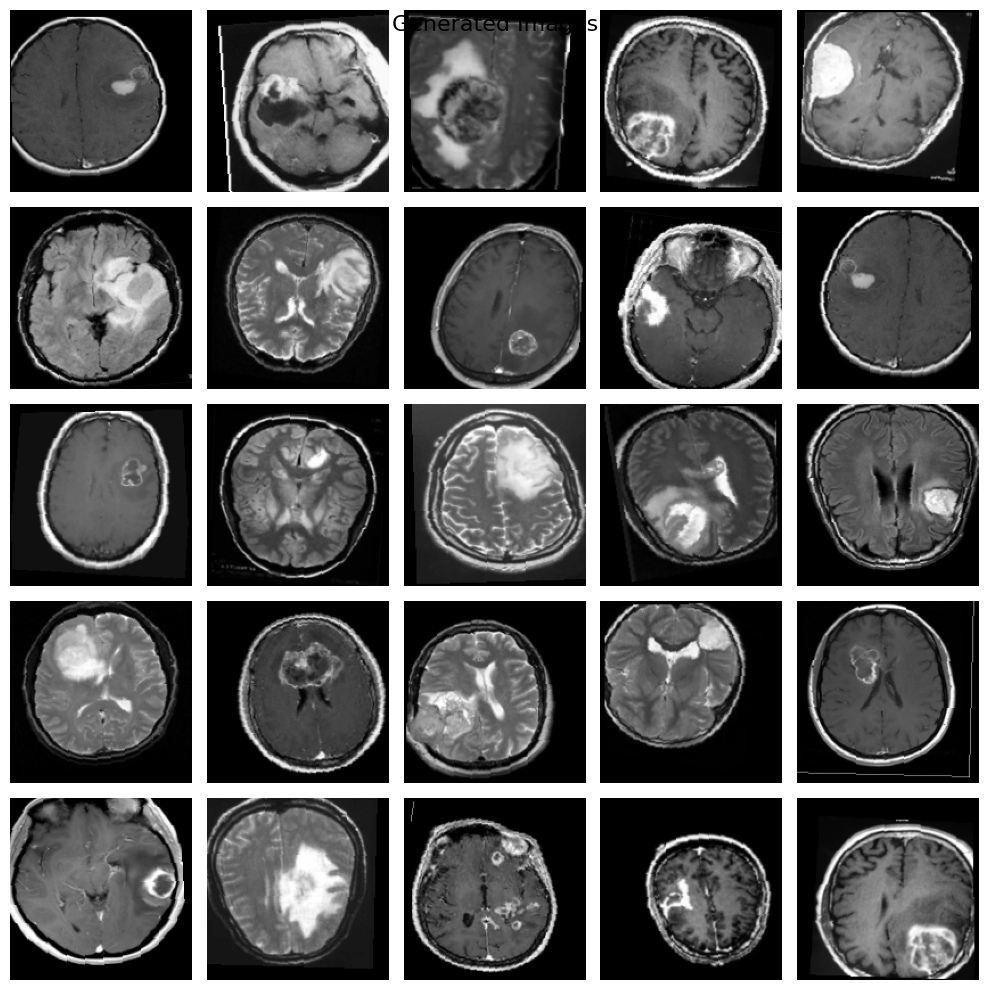

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 191
Samples per class:
Class 0: 74 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])


In [15]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_134: Dataset = generate(num_images=n_augmented_samples, train_loader=no_134)
    gen_yes_134: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_134)
    train_loader = mergeDatasets(
        [no_134.dataset, yes_134.dataset, gen_no_134, gen_yes_134], ["n", "y", "n", "y"], True
    )
    del gen_no_134, gen_yes_134
else:
    train_loader = mergeDatasets([no_134.dataset, yes_134.dataset], ["n", "y"], True)

del no_134, yes_134
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [16]:
test_loader = mergeDatasets([no_2_dataset, yes_2_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 4
Total Samples: 62
Samples per class:
Class 0: 24 samples
Class 1: 38 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Classify

Epoch [1/50], Loss: 0.7435, Accuracy: 61.26%
Epoch [2/50], Loss: 0.6087, Accuracy: 68.59%
Epoch [3/50], Loss: 0.5953, Accuracy: 71.20%
Epoch [4/50], Loss: 0.4731, Accuracy: 79.06%
Epoch [5/50], Loss: 0.5048, Accuracy: 76.44%
Epoch [6/50], Loss: 0.3448, Accuracy: 86.91%
Epoch [7/50], Loss: 0.3104, Accuracy: 86.91%
Epoch [8/50], Loss: 0.3713, Accuracy: 83.25%
Epoch [9/50], Loss: 0.3067, Accuracy: 86.39%
Epoch [10/50], Loss: 0.2451, Accuracy: 90.58%
Epoch [11/50], Loss: 0.2304, Accuracy: 90.58%
Epoch [12/50], Loss: 0.1283, Accuracy: 95.29%
Epoch [13/50], Loss: 0.1936, Accuracy: 92.15%
Epoch [14/50], Loss: 0.1808, Accuracy: 93.19%
Epoch [15/50], Loss: 0.1455, Accuracy: 97.38%
Epoch [16/50], Loss: 0.1820, Accuracy: 91.62%
Epoch [17/50], Loss: 0.3114, Accuracy: 86.91%
Epoch [18/50], Loss: 0.2414, Accuracy: 90.05%
Epoch [19/50], Loss: 0.2626, Accuracy: 88.48%
Epoch [20/50], Loss: 0.3142, Accuracy: 86.39%
Epoch [21/50], Loss: 0.2179, Accuracy: 92.67%
Epoch [22/50], Loss: 0.1002, Accuracy: 96.8

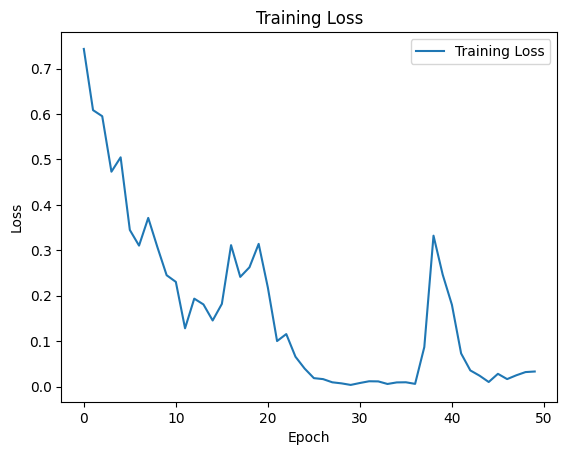

Test Loss: 0.5073, Test Accuracy: 77.42%
Class-wise Accuracy: [79.16666666666667, 76.3157894736842]


In [17]:
test_loss_3, test_acc_3, class_accuracy_3 = classify(train_loader, test_loader)

# Fold 4

In [18]:
no_234: DataLoader = mergeDatasets([no_2_dataset, no_3_dataset, no_4_dataset], ['n', 'n', 'n'], True)
detailsDisplayer(no_234)
yes_234: DataLoader = mergeDatasets([yes_2_dataset, yes_3_dataset, yes_4_dataset], ['y', 'y', 'y'], True)
detailsDisplayer(yes_234)

Batch Size: 16
Number of Batches: 5
Total Samples: 74
Samples per class:
Class 0: 74 samples
Class 1: 0 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Batch Size: 16
Number of Batches: 8
Total Samples: 117
Samples per class:
Class 0: 0 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Train Loader

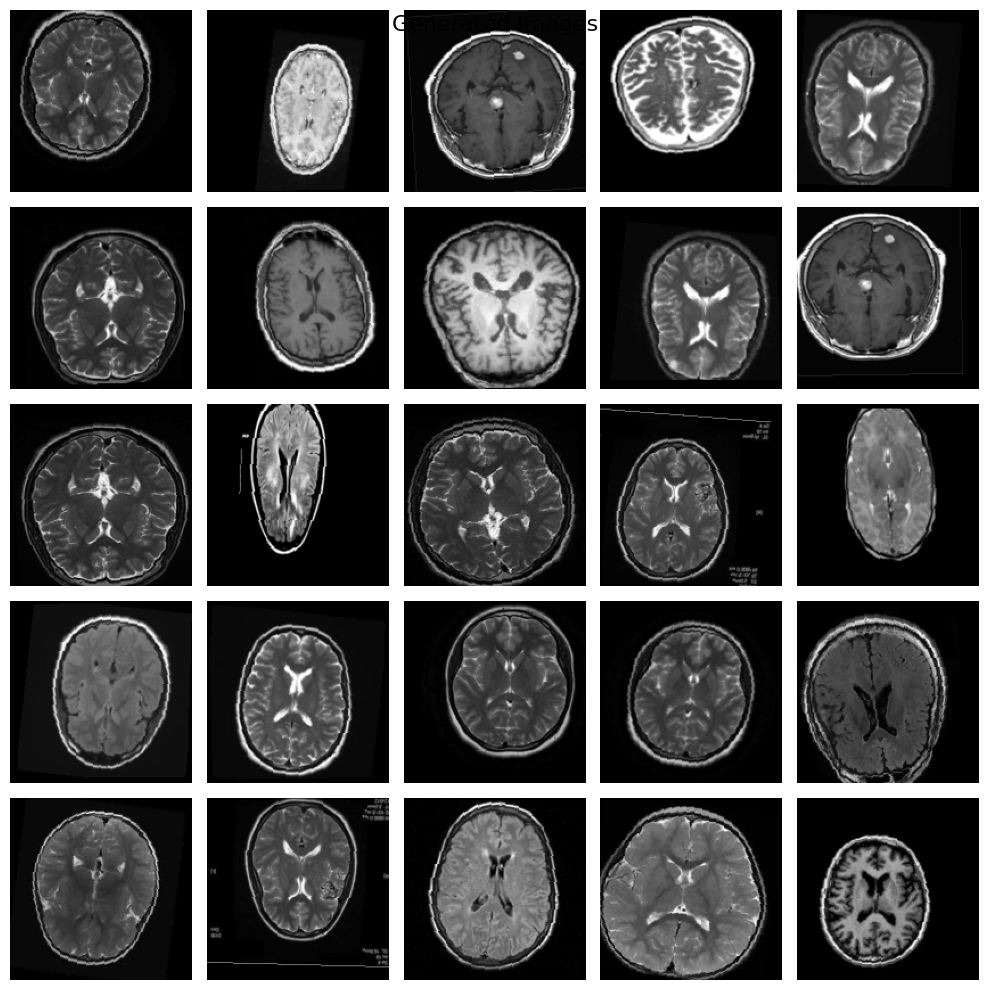

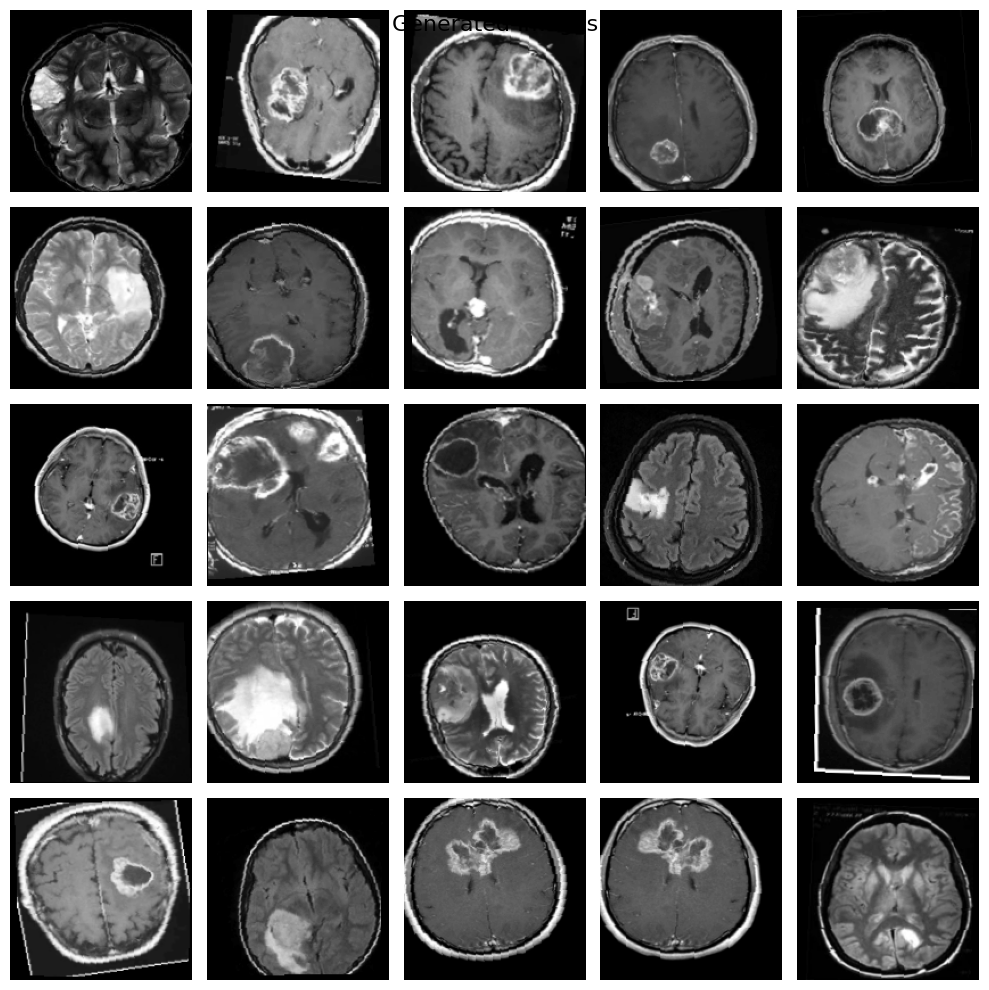

train_loader
Batch Size: 16
Number of Batches: 12
Total Samples: 191
Samples per class:
Class 0: 74 samples
Class 1: 117 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])


In [19]:
train_loader: DataLoader = None
if n_augmented_samples > 0:
    gen_no_234: Dataset = generate(num_images=n_augmented_samples, train_loader=no_234)
    gen_yes_234: Dataset = generate(num_images=n_augmented_samples, train_loader=yes_234)
    train_loader = mergeDatasets(
        [no_234.dataset, yes_234.dataset, gen_no_234, gen_yes_234], ["n", "y", "n", "y"], True
    )
    del gen_no_234, gen_yes_234
else:
    train_loader = mergeDatasets([no_234.dataset, yes_234.dataset], ["n", "y"], True)

del no_234, yes_234
gc.collect()
print('train_loader')
detailsDisplayer(train_loader)

### Test Loader

In [20]:
test_loader = mergeDatasets([no_1_dataset, yes_1_dataset], ["n", "y"], False)
print('test_loader')
detailsDisplayer(test_loader)

test_loader
Batch Size: 16
Number of Batches: 4
Total Samples: 62
Samples per class:
Class 0: 24 samples
Class 1: 38 samples

Batch images shape: torch.Size([16, 160, 160])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Classify

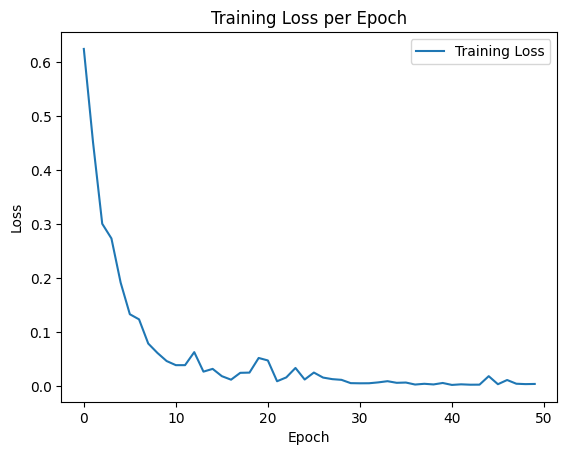

In [21]:
import matplotlib.pyplot as plt

def plot_loss_per_epoch(train_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch')
    plt.legend()
    plt.show()

# Example usage:
train_losses = [0.6240, 0.4512, 0.3003, 0.2731, 0.1914, 0.1328, 0.1233, 0.0785, 0.0611, 0.0461, 0.0385, 0.0385, 0.0626, 0.0265, 0.0316, 0.0181, 0.0116, 0.0243, 0.0247, 0.0518, 0.0472, 0.0087, 0.0158, 0.0333, 0.0119, 0.0248, 0.0155, 0.0126, 0.0113, 0.0052, 0.0049, 0.0050, 0.0066, 0.0088, 0.0058, 0.0063, 0.0026, 0.0040, 0.0028, 0.0055, 0.0019, 0.0030, 0.0023, 0.0024, 0.0181, 0.0032, 0.0110, 0.0041, 0.0034, 0.0037]
plot_loss_per_epoch(train_losses)

Epoch [1/50], Loss: 0.7330, Accuracy: 58.12%
Epoch [2/50], Loss: 0.5333, Accuracy: 73.30%
Epoch [3/50], Loss: 0.4920, Accuracy: 80.10%
Epoch [4/50], Loss: 0.4412, Accuracy: 78.01%
Epoch [5/50], Loss: 0.4000, Accuracy: 82.20%
Epoch [6/50], Loss: 0.3958, Accuracy: 83.77%
Epoch [7/50], Loss: 0.3472, Accuracy: 83.77%
Epoch [8/50], Loss: 0.3097, Accuracy: 86.91%
Epoch [9/50], Loss: 0.2431, Accuracy: 90.58%
Epoch [10/50], Loss: 0.3044, Accuracy: 85.86%
Epoch [11/50], Loss: 0.2965, Accuracy: 91.10%
Epoch [12/50], Loss: 0.2387, Accuracy: 90.05%
Epoch [13/50], Loss: 0.2291, Accuracy: 90.05%
Epoch [14/50], Loss: 0.1428, Accuracy: 93.72%
Epoch [15/50], Loss: 0.1274, Accuracy: 94.24%
Epoch [16/50], Loss: 0.0850, Accuracy: 97.91%
Epoch [17/50], Loss: 0.1221, Accuracy: 96.86%
Epoch [18/50], Loss: 0.2411, Accuracy: 92.15%
Epoch [19/50], Loss: 0.1862, Accuracy: 94.76%
Epoch [20/50], Loss: 0.1247, Accuracy: 96.34%
Epoch [21/50], Loss: 0.0907, Accuracy: 96.86%
Epoch [22/50], Loss: 0.0514, Accuracy: 98.9

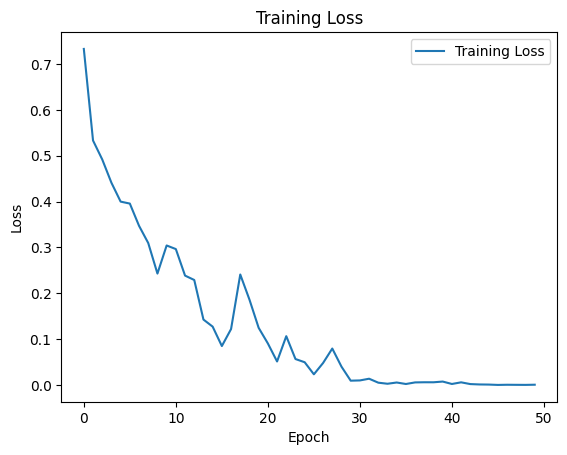

Test Loss: 0.4467, Test Accuracy: 88.71%
Class-wise Accuracy: [79.16666666666667, 94.73684210526316]


In [22]:
test_loss_4, test_acc_4, class_accuracy_4 = classify(train_loader, test_loader)

# Summary

In [23]:
avg_test_loss = (test_loss_1 + test_loss_2 + test_loss_3 + test_loss_4) / 4
avg_test_acc = (test_acc_1 + test_acc_2 + test_acc_3 + test_acc_4) / 4
avg_class_accuracy_0 = (class_accuracy_1[0] + class_accuracy_2[0] + class_accuracy_3[0] + class_accuracy_4[0]) / 4
avg_class_accuracy_1 = (class_accuracy_1[1] + class_accuracy_2[1] + class_accuracy_3[1] + class_accuracy_4[1]) / 4
print(f"Average Test Loss: {avg_test_loss:.4f}, Average Test Accuracy: {avg_test_acc:.2f}%")
print("Average Class 0 Accuracy:", avg_class_accuracy_0)
print("Average Class 1 Accuracy:", avg_class_accuracy_1)

Average Test Loss: 0.6872, Average Test Accuracy: 83.01%
Average Class 0 Accuracy: 76.58333333333334
Average Class 1 Accuracy: 87.07405533063428
